In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import os

import matplotlib.pyplot as plt
%matplotlib inline

# Exploration

The purpose of this notebook is to get familiar with the relevant data sets that are used during the course. You will see examples of how to work with numpy, pandas and plotting libraries. 

## Detailed population data

INSEE provides detailed population information per municipality as open data:

- Go to https://www.insee.fr/fr/statistiques/6544333
- Download "Individus localisés au canton-ou-ville" in CSV format
- Put the downloaded zip file into the folder that contains this notebook
- Unpack the zip file so that the CSV file is located next to this notebook
- Alternatively call the following cell if you are using Linux

In [2]:
if not os.path.exists("FD_INDCVI_2019.csv"):
    !wget https://www.insee.fr/fr/statistiques/fichier/6544333/RP2019_INDCVI_csv.zip
    !unzip RP2019_INDCVI_csv.zip

Next, load a chunk of the data to see what is contained in the file:

In [3]:
df_census = pd.read_csv("FD_INDCVI_2019.csv", sep = ";", nrows = 10)
df_census.head()

CANTVILLE  NUMMI  ACHLR  AEMMR  AGED  AGER20  AGEREV  AGEREVQ  ANAI  ANEMR  \
0        101      1      4      9    68      79      67       65  1949      1   
1        101      2      5      9    33      39      32       30  1983      0   
2        101      2      5      9     1       2       0        0  2015      0   
3        101      2      5      9    30      29      29       25  1986      0   
4        101      3      4      9    72      79      71       70  1948      2   

   ...  TP TRANS  TRIRIS TYPC TYPFC TYPL  TYPMC  TYPMR VOIT  WC  
0  ...   Z     Z  ZZZZZZ    3     Z    2      1     11    1   Z  
1  ...   1     5  ZZZZZZ    2     2    1      4     41    2   Z  
2  ...   Z     Z  ZZZZZZ    2     2    1      4     41    2   Z  
3  ...   1     5  ZZZZZZ    2     2    1      4     41    2   Z  
4  ...   Z     Z  ZZZZZZ    3     Z    2      1     12    0   Z  

[5 rows x 88 columns]

You will find information on the variables in the dataset by clicking on "Dictionnaire des variables" in the link above and downloading the corresponding PDF.

**Task**:  For our first analysis, load the following columns. For performance reasons, it makes sense, to define a data type for each column:
- Detailed age (by year) as `int`
- Socioprofessional category (Catégorie socioprofessionnelle en 8 postes) as `int`

Additionally, load the following columns:
- `IRIS` is an identifier for the location of the observation in France, load it as `str`
- `IPONDI` is a weight of each observation, load it as `float`

In [4]:
columns = {
    "IRIS": str,
    "IPONDI": float,

    "AGED": int,
    "CS1": int

}

df_census = pd.read_csv("FD_INDCVI_2019.csv", sep = ";", dtype = columns, usecols = columns.keys())
df_census.head()

AGED  CS1    IPONDI       IRIS
0    68    7  3.324481  010040101
1    33    6  2.957422  010040202
2     1    8  2.957422  010040202
3    30    6  2.957422  010040202
4    72    7  5.046771  ZZZZZZZZZ

**Task**:  It is always better to work with a cleaned data set, let's clean up the column names:
- The age column to `age`
- The socioprofessional category column to `csp`

In [5]:
df_census = df_census.rename(columns = {
    "IRIS": "iris_id",
    "IPONDI": "weight",

    "AGED": "age",
    "CS1": "csp"
})

df_census.head()

age  csp    weight    iris_id
0   68    7  3.324481  010040101
1   33    6  2.957422  010040202
2    1    8  2.957422  010040202
3   30    6  2.957422  010040202
4   72    7  5.046771  ZZZZZZZZZ

The data set contains the official open census data from the French statistical office INSEE. Let's aggregate the data to obtain a data frame that gives us the number of persons at a certain age:

In [6]:
df_age = df_census.groupby("age").size().reset_index(name = "count")
df_age.head()

age   count
0    0   10337
1    1  227153
2    2  229452
3    3  234656
4    4  238328

And plot this information using plotly:

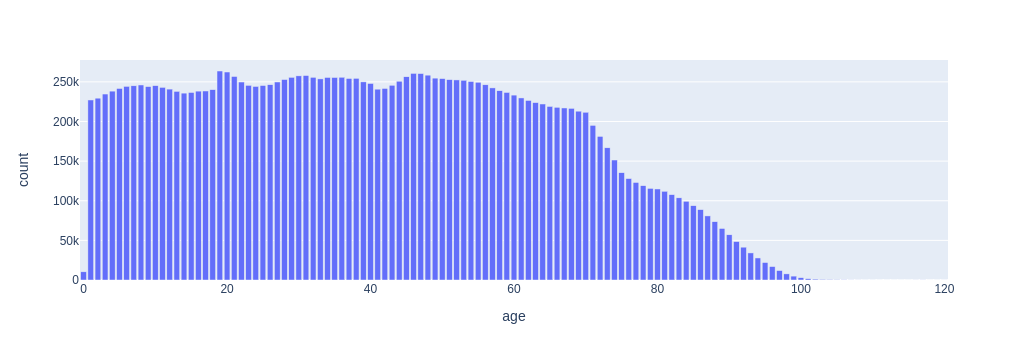

In [7]:
px.bar(df_age, x = "age", y = "count")

Is this information correct? Write the code to calculate total number of observations in the data set:

In [8]:
len(df_census)

19601264

Compare this value with information from other sources like Wikipedia? Do we see a difference? Why?

**Task**: Write the code to calculate the correct number of French inhabitants:

In [9]:
# Insert code here
# ...
df_census["weight"].sum()

66984889.84164774

**Task:** Show a bar plot of both the count of *observations* at a specific age and the number of *persons*.

Hints: 
- You will need another aggregator function than `size` (used before) in your `groupby` statement
- You will need to `merge` the existing `df_age` data frame and a new one that you create
- For the y-axis, you may pass a list of columns to plotly
- Try to use the `barmode = "group"` argument for plotly

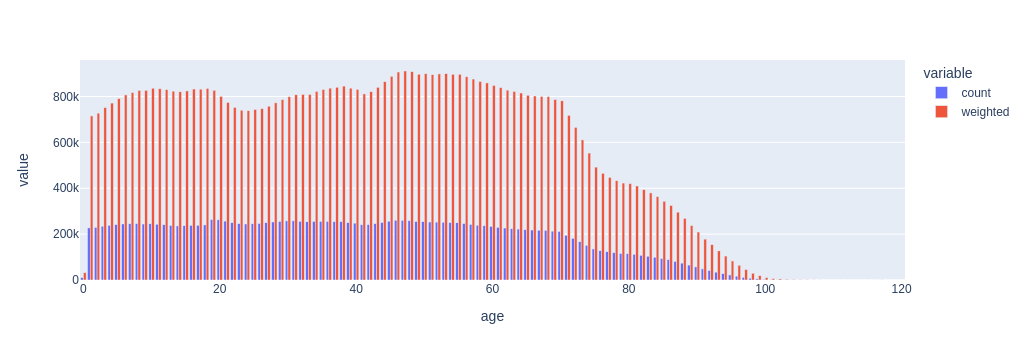

In [10]:
# Insert code here
# ...

df_age_weighted = df_census.groupby("age")["weight"].sum().reset_index(name = "weighted")
df_age_weighted.head()

#px.bar(df_age_weighted, x = "age", y = "count")

df_comparison = pd.merge(df_age, df_age_weighted, on = "age")

px.bar(df_comparison, x = "age", y = ["count", "weighted"], barmode = "group")

**Task:** On average, how many persons are represented by one observation in the census data?

In [11]:
# Insert code here
# ...

df_census["weight"].mean()

3.417376034609183

Let's explore the data a bit further. 

**Task:** Show the number of persons for each socioprofessional category in a plot.

Bonus: Instead of showing only CSP identifiers, can you show the name of the CSPs?

Remember, the socioprofessional category is a classification of persons in France according to their job status:
https://www.insee.fr/fr/metadonnees/pcs2003/categorieSocioprofessionnelleAgregee/1?champRecherche=true

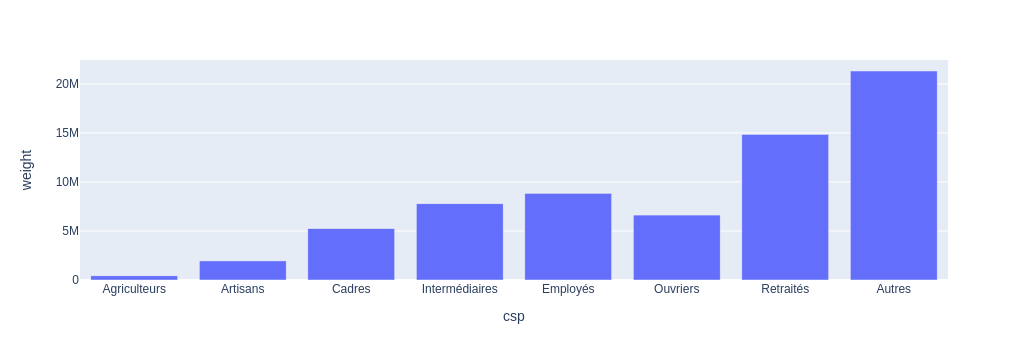

In [12]:
df_csp = df_census.groupby("csp")["weight"].sum().reset_index()

df_csp["csp"] = df_csp["csp"].replace({
    1: "Agriculteurs",
    2: "Artisans",
    3: "Cadres",
    4: "Intermédiaires",
    5: "Employés",
    6: "Ouvriers",
    7: "Retraités",
    8: "Autres"
})

px.bar(df_csp, x = "csp", y = "weight")

**Task:** Show a bar plot with one age distribution per CSP in different colors and use it to compare the age distribution of at least three CSP.

Hint:
- You will need to aggregate over two columns this time.

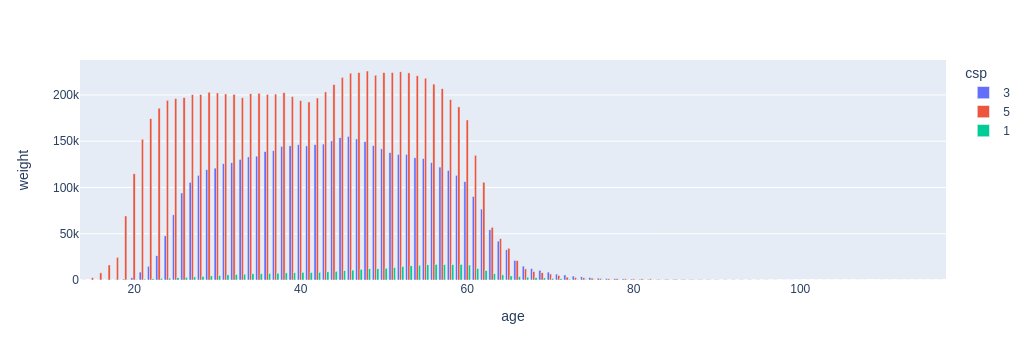

In [13]:
df_age = df_census.groupby(["age", "csp"])["weight"].sum().reset_index()
df_age = df_age[  df_age["csp"].isin([1, 3, 5])  ]
df_age["csp"] = df_age["csp"].astype(str)

px.bar(df_age, x = "age", y = "weight", color = "csp", barmode = "group")

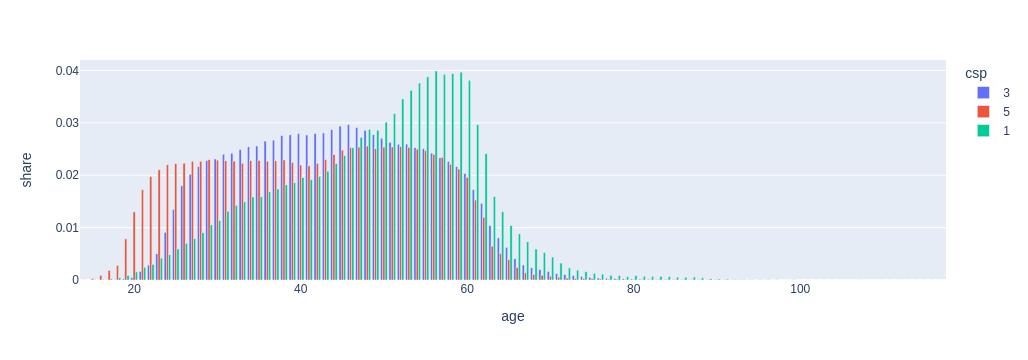

In [14]:
df_age = df_census.groupby(["age", "csp"])["weight"].sum().reset_index()
df_age = df_age[  df_age["csp"].isin([1, 3, 5])  ]
df_age["csp"] = df_age["csp"].astype(str)

df_total = df_age.groupby("csp")["weight"].sum().reset_index(name = "total")

df_age = pd.merge(df_age, df_total, on = "csp")
df_age["share"] = df_age["weight"] / df_age["total"]

px.bar(df_age, x = "age", y = "share", color = "csp", barmode = "group")

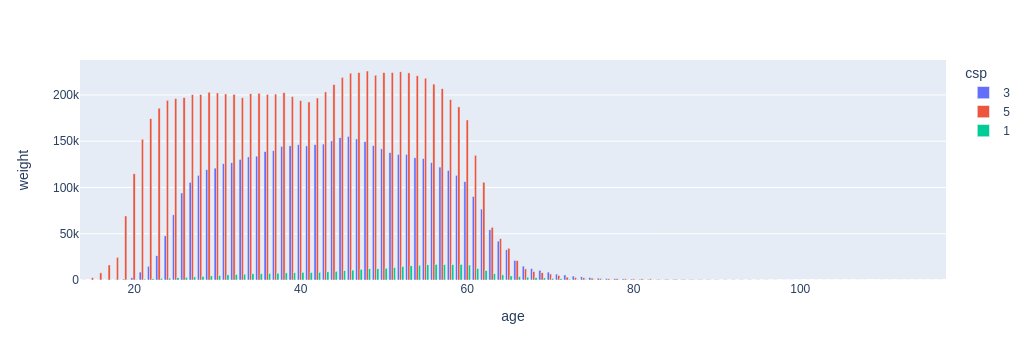

In [15]:
# Insert code here
# ...

df_age = df_census.groupby(["age", "csp"])["weight"].sum().reset_index()
df_age = df_age[df_age["csp"].isin([1, 3, 5])]
df_age["csp"] = df_age["csp"].astype(str)

px.bar(df_age, x = "age", y = "weight", color = "csp", barmode = "group")

The previous analysis were performed in absolute terms. Let's pass on to a relative analysis. We want to know which percentage of people belonging to a certain CSP has a certain age. So the bars should sum up to one per CSP.

**Task:** Set up a plot where two or three CSP are shown with their relative age distribution, summing up to one for each CSP.

Hints:
- Proceed as in the previous task, but perform a second aggregation by CSP.
- Via `merge`, append another column to the two-variable data set that describes this total
- Then, divide the absolute value by the group total

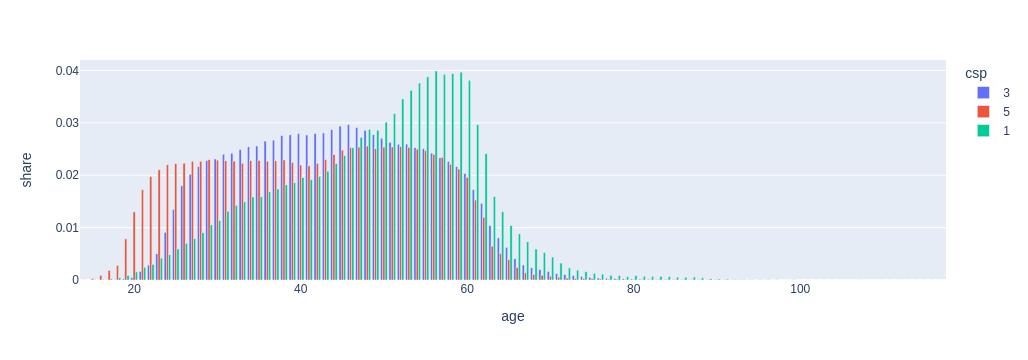

In [16]:
# Insert code here
# ...

df_age = df_census.groupby(["age", "csp"])["weight"].sum().reset_index()
df_total = df_census.groupby("csp")["weight"].sum().reset_index().rename(columns = { "weight": "total" })

df_age = pd.merge(df_age, df_total, on = "csp")
df_age["share"] = df_age["weight"] / df_age["total"]

df_age = df_age[df_age["csp"].isin([1, 3, 5])]
df_age["csp"] = df_age["csp"].astype(str)

px.bar(df_age, x = "age", y = "share", color = "csp", barmode = "group")

In [17]:
df_census

age  csp    weight    iris_id
0          68    7  3.324481  010040101
1          33    6  2.957422  010040202
2           1    8  2.957422  010040202
3          30    6  2.957422  010040202
4          72    7  5.046771  ZZZZZZZZZ
...       ...  ...       ...        ...
19601259   40    5  4.999988  974220106
19601260   59    4  0.999997  974220401
19601261   41    8  4.361100  974220203
19601262   74    7  4.361100  974220203
19601263   73    7  4.361100  974220203

[19601264 rows x 4 columns]

## Spatial data

So far, we have only performed analysis over the whole French population. The data set contains a column called `IRIS`. This is a statistical zoning system that covers France. Each zone in that system has a unique identifier. It is constructed as follows:

- `[2]` digits are the department identifier
- `[3]` following digits describe the municipality
- `[4]` following digits describe the IRIS (sub-municipality zoning)

For instance, the 14e arrondissement in Paris has the `75` as the department identifier `75`, followed by `114` indicating the arrondissement. After, there are four digits that describe smaller zones within the arrondissement, for instance:

`[75][115][0001]`

**Task:** For convience, let's create additional columns that indicate the department and the municipality of an observation:
- `department_id`: The first two digits of `iris_id`
- `municipality_id`: The five first digits of `iris_id`

In [18]:
### Insert code here
# ...

df_census["department_id"] = df_census["iris_id"].str[:2]
df_census["municipality_id"] = df_census["iris_id"].str[:5]

**Task:** Find out which are the 10 departments with the highest number of inhabitants. Which are the 10 least inhabitated ones?

In [19]:
### Insert code here
# ...

df_census.groupby("department_id")["weight"].sum().sort_values(ascending = True).head(10)

department_id
23    21001.748482
48    21193.664558
46    29788.375984
55    31557.264547
09    37617.735564
15    38311.928683
32    43633.684235
70    45755.536192
43    47917.796050
04    51613.964620
Name: weight, dtype: float64

Do you observe anything special?

**Task:** Let's repeat the exercise by identifying the top 10 and bottom 10 municipalities:

In [20]:
### Insert code here
# ...



df_census.groupby("municipality_id")["weight"].sum().sort_values(ascending = True).head(10)

municipality_id
25632    3161.582206
58134    3215.000000
25230    3226.854180
23008    3230.915493
08185    3304.898541
58079    3545.000000
87011    3661.681636
49215    3725.952997
25228    3750.000000
30350    3781.506653
Name: weight, dtype: float64

In [21]:
df_census

age  csp    weight    iris_id department_id municipality_id
0          68    7  3.324481  010040101            01           01004
1          33    6  2.957422  010040202            01           01004
2           1    8  2.957422  010040202            01           01004
3          30    6  2.957422  010040202            01           01004
4          72    7  5.046771  ZZZZZZZZZ            ZZ           ZZZZZ
...       ...  ...       ...        ...           ...             ...
19601259   40    5  4.999988  974220106            97           97422
19601260   59    4  0.999997  974220401            97           97422
19601261   41    8  4.361100  974220203            97           97422
19601262   74    7  4.361100  974220203            97           97422
19601263   73    7  4.361100  974220203            97           97422

[19601264 rows x 6 columns]

## Mapping

Looking at spatial data works best when using maps. The IRIS system is not only a system of identifiers, but there is also geographic shape data attached to it. The data is provided by IGN (Institut Géographique National).

- Download the data from https://geoservices.ign.fr/contoursiris
- Make sure to download the 2021 edition which is compatible with our 2019 census data
- Unpack the 7z file in the current folder
- The relevant files are located in `CONTOURS*/1_DONNES/*LAMB93*/` (make sure about the last `LAMB93` part)
- Copy the files prefixed with `CONTOURS-IRIS.*` to the folder where this notebook is located

Let's load the data using `geopandas`:

In [23]:
df_iris = gpd.read_file("CONTOURS-IRIS.shp")
df_iris.head()

INSEE_COM   NOM_COM  IRIS  CODE_IRIS NOM_IRIS TYP_IRIS  \
0     72191     Mayet  0000  721910000    Mayet        Z   
1     77248   Lesches  0000  772480000  Lesches        Z   
2     51426      Péas  0000  514260000     Péas        Z   
3     81199    Padiès  0000  811990000   Padiès        Z   
4     59225  Feignies  0102  592250102      Sud        H   

                                            geometry  
0  POLYGON ((498083.500 6747517.400, 498128.000 6...  
1  POLYGON ((685753.100 6868612.900, 685757.700 6...  
2  POLYGON ((759067.200 6849592.700, 758778.600 6...  
3  POLYGON ((651482.800 6326359.400, 651475.600 6...  
4  POLYGON ((767673.500 7022290.500, 767647.200 7...

As before, let's clean up the data set. We will need the following columns with the following readable names:
- `INSEE_COM`: `municipality_id`
- `CODE_IRIS`: `iris_id`
- `geometry`

**Task:** Set up the data set accordingly.

In [24]:
### Insert code here
# ...

df_iris = df_iris.rename(columns = {
    "INSEE_COM": "municipality_id",
    "CODE_IRIS": "iris_id",
})[["iris_id", "municipality_id", "geometry"]]

df_iris

iris_id municipality_id  \
0      721910000           72191   
1      772480000           77248   
2      514260000           51426   
3      811990000           81199   
4      592250102           59225   
...          ...             ...   
48584  710730102           71073   
48585  385450101           38545   
48586  740630000           74063   
48587  951010000           95101   
48588  384030000           38403   

                                                geometry  
0      POLYGON ((498083.500 6747517.400, 498128.000 6...  
1      POLYGON ((685753.100 6868612.900, 685757.700 6...  
2      POLYGON ((759067.200 6849592.700, 758778.600 6...  
3      POLYGON ((651482.800 6326359.400, 651475.600 6...  
4      POLYGON ((767673.500 7022290.500, 767647.200 7...  
...                                                  ...  
48584  POLYGON ((831995.400 6646411.800, 831977.700 6...  
48585  POLYGON ((912429.500 6439712.700, 912342.600 6...  
48586  POLYGON ((991081.900 6580596.800, 991205.600 6...  
48587  POLYGON ((603615.500 6895980.900, 603612.300 6...  
48588  POLYGON ((914830.900 6422198.700, 914914.300 6...  

[48589 rows x 3 columns]

**Task**: Calculate how many IRIS exist in France and how many municipalities are there:

In [25]:
len(df_iris["municipality_id"].unique()), len(df_iris["iris_id"].unique())

(34878, 48589)

You can try plotting all IRIS or all municipalities, but this will usually take a while with the standard Python tools. Let's plot only Paris:

<Axes: >

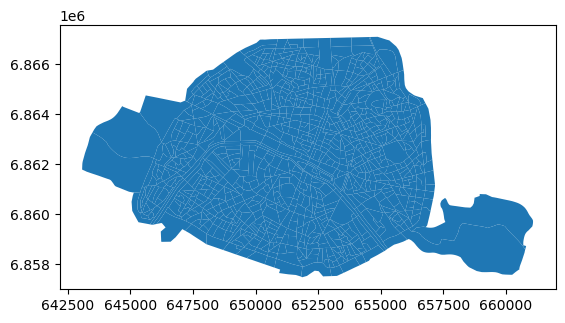

In [26]:
df_iris[
    df_iris["municipality_id"].str.startswith("75")
].plot()

**Task**: Only the spatial shapes are not really useful. We should attach some data to it. To simplify our life, let's create a data frame based on `df_iris` that only contains the municipality shapes `df_municipalities`.

Hint: Check the `dissolve` method in `geopandas`.

<Axes: >

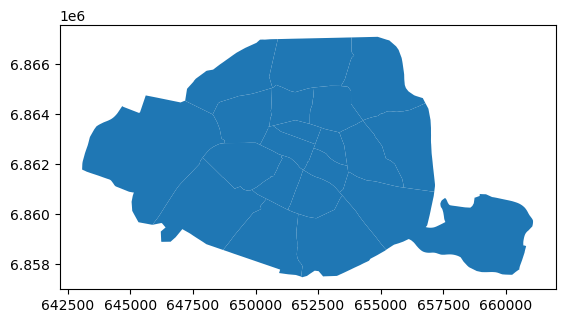

In [30]:
### Insert code here
# ...

df_municipalities = df_iris.dissolve("municipality_id").reset_index()

df_municipalities[
    df_municipalities["municipality_id"].str.startswith("75")
].plot()

**Task**: Plot all municipalities in the Essonne departmennt (91).

<Axes: >

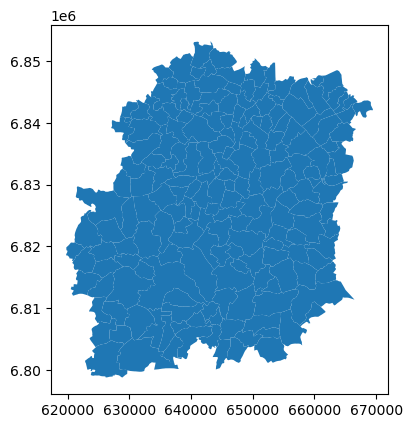

In [31]:
### Insert code here
# ...

df_municipalities[
    df_municipalities["municipality_id"].str.startswith("91")
].plot()

The following list contains all departments in the Île-de-France region:

In [32]:
idf_departments = ["75", "92", "93", "94", "95", "77", "91", "78"]

**Task**: Show all municipalities in the Île-de-France region.

<Axes: >

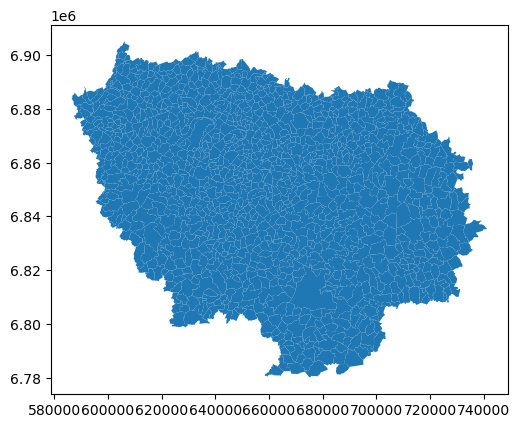

In [35]:
### Insert code here
# ...

df_municipalities[
    df_municipalities["municipality_id"].str[:2].isin(idf_departments)
].plot()


**Task**: Now we are ready to cross some information with the spatial data set:
- Prepare a data set that contains the number of inhabitants per municipality (`municipality_id`, `inhabitants`)
- Perform a merge between your municipality data frame and the inhabitant data frame
- Provide the inhabitants column in the `plot` method

In [36]:
df_census

age  csp    weight    iris_id department_id municipality_id
0          68    7  3.324481  010040101            01           01004
1          33    6  2.957422  010040202            01           01004
2           1    8  2.957422  010040202            01           01004
3          30    6  2.957422  010040202            01           01004
4          72    7  5.046771  ZZZZZZZZZ            ZZ           ZZZZZ
...       ...  ...       ...        ...           ...             ...
19601259   40    5  4.999988  974220106            97           97422
19601260   59    4  0.999997  974220401            97           97422
19601261   41    8  4.361100  974220203            97           97422
19601262   74    7  4.361100  974220203            97           97422
19601263   73    7  4.361100  974220203            97           97422

[19601264 rows x 6 columns]

<Axes: >

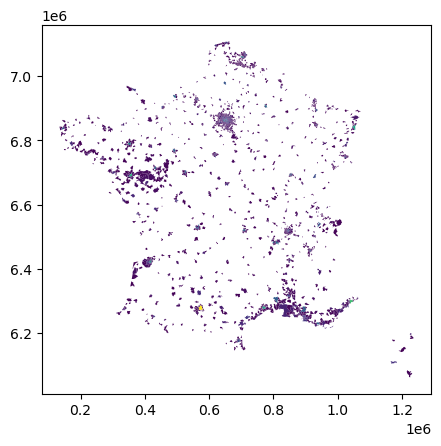

In [40]:
### Insert code here
# ...

df_inhabitants = df_census.groupby("municipality_id")["weight"].sum().reset_index()

pd.merge(df_municipalities, df_inhabitants).plot("weight")

**Task**: Plot a population map of Île-de-France with a legend (using `legend = True`)

<Axes: >

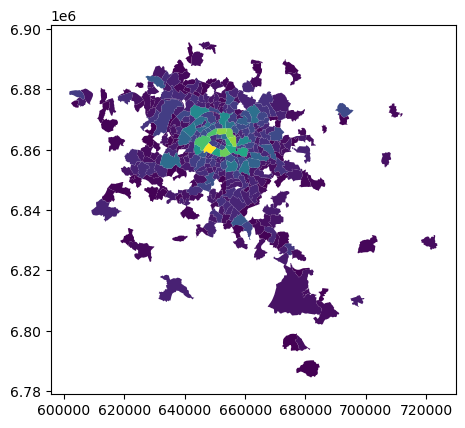

In [41]:
### Insert code here
# ...

df_inhabitants = df_census.groupby("municipality_id")["weight"].sum().reset_index()

pd.merge(df_municipalities[
    df_municipalities["municipality_id"].str[:2].isin(idf_departments)         
], df_inhabitants).plot("weight")

Do you observe anything specific?

## Aggregated population data

To solve the issue, INSEE provides aggregated census data sets with less attributes but higher spatial availability. We will make use of a data set that indicates the total population and population per CSP over 15 years for every municipality in France:

- The data is available at https://www.insee.fr/fr/statistiques/6543200
- Download "Population en 2019 - IRIS - France hors Mayotte" in CSV format
- Information on the variables is avaialble in "Dictionnaire des variables"

**Task**: Load the data set have a first look
- Only load a couple of lines (`nrows=20`) to be sure that you don't exceed your memory
- Look at the first few lines and check the explanation of the variables online
- How can you obtain the population total per municipality from this data set?
- How can you obtain the number of persons per CSP from this data set?

In [44]:
### Insert code here
# ...

pd.read_csv("base-ic-evol-struct-pop-2019.CSV", nrows = 20, sep = ";")

IRIS   COM TYP_IRIS  MODIF_IRIS  LAB_IRIS      P19_POP  P19_POP0002  \
0   10010000  1001        Z           0         5   779.000000    28.717996   
1   10020000  1002        Z           0         5   256.000000    14.822643   
2   10040101  1004        H           0         1  1866.820612    81.762602   
3   10040102  1004        H           0         1  3597.838556   168.897927   
4   10040201  1004        H           0         1  4134.477890   167.871616   
5   10040202  1004        H           0         1  4534.862942   149.032630   
6   10050000  1005        Z           0         5  1751.000000    61.904040   
7   10060000  1006        Z           0         5   112.000000     3.054545   
8   10070000  1007        Z           0         5  2800.000000   116.000000   
9   10080000  1008        Z           0         5   762.000000    21.095829   
10  10090000  1009        Z           0         5   326.000000     4.935695   
11  10100000  1010        Z           0         5  1105.000000    41.056218   
12  10110000  1011        Z           0         5   368.000000    14.264984   
13  10120000  1012        Z           0         5   329.000000     9.127141   
14  10130000  1013        Z           0         5   143.000000     6.951389   
15  10140000  1014        Z           0         5  3349.000000    85.230004   
16  10150000  1015        Z           0         5   650.000000    16.029626   
17  10160000  1016        Z           0         5   460.000000    10.043668   
18  10170000  1017        Z           0         5   457.000000    17.371030   
19  10190000  1019        Z           0         5    27.000000     0.000000   

    P19_POP0305  P19_POP0610  P19_POP1117  ...  C19_F15P_CS4  C19_F15P_CS5  \
0     17.704186    56.118237    88.707423  ...     51.660136     85.506573   
1     10.649265    14.954810    25.657176  ...     21.129095     26.532030   
2     47.104967   100.705691   139.733038  ...     97.002069    230.709482   
3    119.186603   198.365404   259.072890  ...    227.534831    393.985009   
4    174.765320   272.922347   394.708508  ...    251.065974    374.705891   
5    182.900634   328.935646   431.321937  ...    373.780995    389.637137   
6     67.799663   122.825477   154.268799  ...    112.999439    245.650954   
7      1.018182     3.054545     8.145455  ...     10.181818     10.181818   
8    112.000000   222.000000   281.000000  ...    230.000000    315.000000   
9     28.067781    48.114928    69.157812  ...     70.322093     85.929791   
10     7.885904    19.594743    31.620084  ...     45.291134     40.187334   
11    48.506678   101.193906   105.811126  ...     39.298400    148.981171   
12    14.359813    33.174381    36.314543  ...     24.176675     19.629455   
13    13.161852    20.295785    34.470350  ...     15.142322     40.428113   
14     5.958333     8.937500    10.923611  ...      4.965278     19.861111   
15   102.255036   249.103257   321.308989  ...    134.723311    251.032604   
16    15.987780    35.948290    56.972755  ...     55.291177     60.239139   
17    20.087336    35.152838    57.248908  ...     45.196507     45.196507   
18    26.573519    33.159498    38.617822  ...      5.440743     37.908100   
19     1.038462     2.076923     0.000000  ...      0.000000      0.000000   

    C19_F15P_CS6  C19_F15P_CS7  C19_F15P_CS8   P19_POP_FR  P19_POP_ETR  \
0      30.706106     74.014043     15.282114   770.764925     8.235075   
1       0.000000     20.804745      0.000000   253.880636     2.119364   
2      57.381411    173.435664    188.940291  1581.546546   285.274066   
3     153.027649    395.418257    324.027792  3147.417422   450.421134   
4     192.484961    512.421938    366.036586  3774.171377   360.306514   
5     139.310148    483.551623    345.786401  4358.626449   176.236493   
6      19.652076    181.781706     78.608305  1718.574074    32.425926   
7       5.090909     15.272727      0.000000   104.872727     7.127273   
8      70.000000    220.000000    175.00000

**Task**: Transform the data set such that you have each municipality together with the population total and the total of each CSP:

In [45]:
pd.DataFrame({ "municipality_id": [], "population": [], "csp_1": [], "csp_2": [], "csp_3": [], "csp_...": [] })

Empty DataFrame
Columns: [municipality_id, population, csp_1, csp_2, csp_3, csp_...]
Index: []

Hint: The data set is given per IRIS.

In [56]:
### Insert code here
# ...

columns = ["COM", "C19_POP15P"]
columns += ["C19_POP15P_CS{}".format(k) for k in range(1, 9)]

df_population = pd.read_csv("base-ic-evol-struct-pop-2019.CSV", sep = ";", usecols = columns, dtype = {
     "COM": str   
})

renamed_columns = ["municipality_id", "population"]
renamed_columns += ["csp_{}".format(k) for k in range(1, 9)]

df_population.columns = renamed_columns

df_population = df_population.groupby("municipality_id").sum().reset_index()
df_population

municipality_id    population        csp_1        csp_2        csp_3  \
0               01001    619.406049    15.565978    19.822632    76.142088   
1               01002    205.408895     0.000000    21.265503    15.927908   
2               01004  11508.832532     2.762881   327.166403   784.225660   
3               01005   1390.384400     4.913019   112.999439   112.999439   
4               01006     91.636364     0.000000     0.000000     5.090909   
...               ...           ...          ...          ...          ...   
34985           97420  18357.493396   132.645899   600.979456   760.699348   
34986           97421   5395.000000   205.000000   145.000000    60.000000   
34987           97422  61865.447815  1105.911121  2429.827432  2229.743854   
34988           97423   5578.591701    60.509132   156.315256   196.654677   
34989           97424   4325.730842    42.275545   127.181990    67.636782   

             csp_4         csp_5        csp_6         csp_7         csp_8  
0        98.357964    100.516361   126.843164    152.541469     29.616393  
1        26.460181     42.135589    10.596822     67.296631     21.726261  
2      1890.243930   1891.133347  2001.750487   2763.422684   1848.127141  
3       221.085859    294.781145   186.694725    338.998316    117.912458  
4        25.454545     15.272727    15.272727     25.454545      5.090909  
...            ...           ...          ...           ...           ...  
34985  2486.081710   3999.997623  2624.710721   2440.443091   5311.935549  
34986   345.000000    920.000000  1135.000000    660.000000   1925.000000  
34987  7022.017452  12993.475117  8175.812588  10539.247496  17369.412753  
34988   579.879177   1356.413032  1025.279554    675.685302   1527.855571  
34989   281.181830    939.925428   931.145285    731.173870   1205.210112  

[34990 rows x 10 columns]

**Task**: Repeat the task from above, create a map of the population in Île-de-France, but with the new data set.

<Axes: >

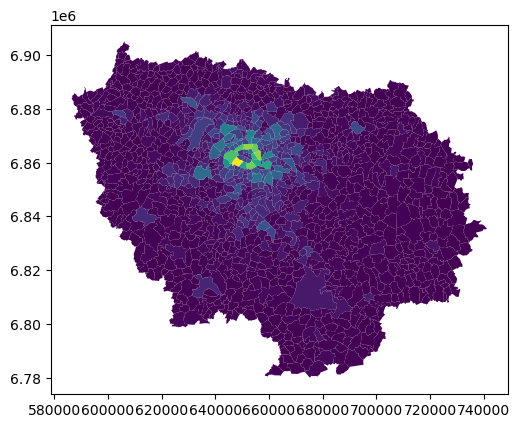

In [58]:
### Insert code here
# ...

pd.merge(df_municipalities[
    df_municipalities["municipality_id"].str[:2].isin(idf_departments)         
], df_population, on = "municipality_id").plot("population")

Save the cleaned population data, because we will need it again in a later exercise:

In [ ]:
df_population.to_parquet("population.parquet")

Let's do the same with the municipalities spatial data set:

In [ ]:
df_municipalities.to_parquet("municipalities.parquet")

For mapping, Python can be useful to make a first draft, but there are more elaborate tools available. 

**Task**: Create a data frame in which the municipality data has been merged with the the population data set, i.e., we want all columns from the population data set and additionally the `geometry` column. Filter for all municipalities in Île-de-France. Save this data frame in GeoPackage format:

In [61]:
### Insert code here
# ...

df_export = pd.merge(df_municipalities[
    df_municipalities["municipality_id"].str[:2].isin(idf_departments)         
], df_population, on = "municipality_id")

df_export

municipality_id                                           geometry  \
0              75101  POLYGON ((652052.100 6862002.000, 652048.700 6...   
1              75102  POLYGON ((651769.900 6863019.900, 651741.200 6...   
2              75103  POLYGON ((652773.900 6862443.000, 652688.900 6...   
3              75104  POLYGON ((653036.300 6861194.000, 653030.900 6...   
4              75105  POLYGON ((652395.600 6859838.800, 652364.600 6...   
...              ...                                                ...   
1282           95676  POLYGON ((608000.000 6886602.000, 607973.100 6...   
1283           95678  POLYGON ((645264.100 6888152.200, 645279.800 6...   
1284           95680  POLYGON ((656141.900 6877322.900, 656091.200 6...   
1285           95682  POLYGON ((656543.000 6887123.500, 656421.900 6...   
1286           95690  POLYGON ((613437.800 6886935.600, 613437.100 6...   

        iris_id    population     csp_1        csp_2         csp_3  \
0     751010301  14148.091761  8.219674   858.482574   4539.964151   
1     751020802  18955.541855  5.794080  1118.387492   7495.073734   
2     751030905  30147.397523  0.000000  1681.731888  10884.185943   
3     751041501  25655.441386  9.301578  1298.542305   8398.581660   
4     751052004  51493.718545  9.852432  1949.135156  16721.625324   
...         ...           ...       ...          ...           ...   
1282  956760000    380.000000  0.000000    20.000000     30.000000   
1283  956780000    720.129937  0.000000    29.831688    149.606722   
1284  956800111  20941.725791  0.000000   585.437664    742.709506   
1285  956820000    160.000000  0.000000     5.000000     25.000000   
1286  956900000    290.600782  0.000000    20.116053     49.799073   

            csp_4        csp_5        csp_6         csp_7         csp_8  
0     1836.291785  1488.190288   473.571426   2595.369864   2348.001999  
1     2938.076049  2087.738607   755.340909   2139.595643   2415.535341  
2     4689.087838  3050.944542   834.942053   4538.600484   4467.904777  
3     3745.753317  2786.955909   677.409856   4466.380306   4272.516454  
4     5921.875817  4009.463485  1112.417454  10496.187055  11273.161823  
...           ...          ...          ...           ...           ...  
1282    95.000000    80.000000    30.000000     80.000000     45.000000  
1283   124.448119    89.988483    59.668593    192.608043     73.978288  
1284  2458.953825  4834.277698  3521.384726   3174.423583   5624.538789  
1285    30.000000    45.000000    15.000000     25.000000     15.000000  
1286    83.196795    14.496535    24.672422     60.718307     37.601598  

[1287 rows x 12 columns]

In [62]:
df_export.to_file("export.gpkg")

**Exercise**: Explore the exported data using **QGIS**

![](qgis.png)

## Employment

In a later exercise, we will also need information on employment. Employment data per municipality is avaialble as open data from Urssaf.

- Download the data from https://open.urssaf.fr/explore/dataset/etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last/information/
- Go to "Export" and export the data as CSV

**Task**: As before, explore the data by first loading a few columns and understanding the content.

Hint: To get a better overview of the available columns, try `df.columns`

In [ ]:
### Insert code here
# ...


**Task**: Clean the data set such that you have a column indicating the municipality identifier and the number of emloyees in 2019 in that zone.

Hint: The data frame is disaggregated over various economic sectors (NAF code), but we want the total!

In [ ]:
pd.DataFrame({ "municipality_id": [], "emloyment": [] })

In [ ]:
### Insert code here
# ...

# df_employment = ...


**Task**: Plot a map of the number of employees in a department of your choice

In [ ]:
### Insert code here
# ...


Let's save this data for later:

In [ ]:
df_employment.to_parquet("employment.parquet")

## Commuting data

Finally, we will have a look at a more complex data set: commuting data. This data set is also available from INSEE and describes how many people living in a specific municipality in France to to any other municipality for work. This data set is known as *MOBPRO*.

- Download the data from https://www.insee.fr/fr/statistiques/6456056
- Download the data in CSV format

**Task**: Load the data set with the following columns:
- `COMMUNE` : `str`
- `ARM` : `str`
- `DCLT`: `str`
- `IPONDI`: `float`
- `TRANS`: `int`

In [ ]:
### Insert code here
# ...

# df_commutes = ...


The MOBPRO data set is a bit particular with respect to the spatial identifiers. In fact, `DCLT` describes the destination of a commuters as a municipality identifier. In principle, this is also the case for `COMMUNE` which describes the origin. However, Paris, for instance, is encoded as `75056`, but the actual "municipality" (or arrondissement) is contained in `ARM`. If one knows this, there is an easy fix:

In [ ]:
f = df_commutes["ARM"] != "ZZZZZ"
df_commutes.loc[f, "COMMUNE"] = df_commutes.loc[f, "ARM"]

**Task**: Reformat the data frame so that we have the following format.

In [ ]:
pd.DataFrame({ "origin_id": [], "destination_id": [], "weight": [], "transport_mode": [] })

In [ ]:
### Insert code here
# ...


**Task**: Plot a map showing how many people commute from Alfortville (94002) in the south of Paris to any other municipality in Île-de-France **by car**.

In [ ]:
### Insert code here
# ...


**Task**: Plot the same map but for commutes by **public transport**. What do you notice?

In [ ]:
### Insert code here
# ...


**Task:** Aggregate the commuting data set further by removing the `transport_mode` column such that we only have the bare commuting flows as a weight between two municipalities. Then, save the data set as `commutes.parquet`, we will need it later on!

In [ ]:
### Insert code here
# ...


**Congratulations!** You can now solve Exercise 1 of the course project.